# COGS 118A - Final Project

# Food Recognition

# Names 
- Joshua Garcia
- Rey Mendoza
- Ryan Burden
- Terence Ting

# Abstract 
The ability to create a model that is able to classify foods accurately is an achievement that could aid in the creation of applications that can help people track what foods they are consuming and possibly characterize food by calories or ingredients. Our goal was to create such a model and scratch the surface of these long term goals. We accomplished this by implementing a couple of classification algorithms on a large dataset containing various food images and exposed these models to noise to see which would classify best against noise. Then we selected the best model and optimized it. The dataset acquired, aptly named 'food101', consists of 101,000 labeled images. Each datapoint has the dimensionality of (256, 256, 3), as the images are 256 x 256 in pixel resolution and there are 3 color channels. Here is an example of one figure:

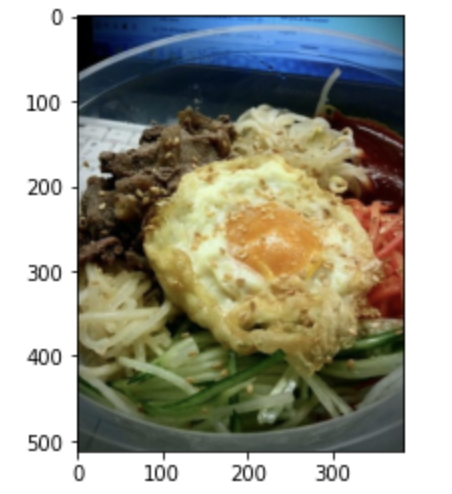

The models trained for classification were SVM, KNN, and a CNN architecture. We determined the optimal hyperparameters and architectures for each model and then compared each by testing accuracy, precision, recall and F1 score. Our results were as follows:

In [2]:
print('Average accuracy in SVM: 64%')
print('Average precision of 5 categories in SVM: 0.64')
print('Average recall of 5 categories in SVM: 0.642')
print('Average F1 score of 5 categories in SVM: 0.64')

Average accuracy in SVM: 64%
Average precision of 5 categories in SVM: 0.64
Average recall of 5 categories in SVM: 0.642
Average F1 score of 5 categories in SVM: 0.64


In [3]:
print('Average accuracy in KNN: 48%')
print('Average precision of 5 categories in KNN: 0.478')
print('Average recall of 5 categories in KNN: 0.582')
print('Average F1 score of 5 categories in KNN: 0.438')

Average accuracy in KNN: 48%
Average precision of 5 categories in KNN: 0.478
Average recall of 5 categories in KNN: 0.582
Average F1 score of 5 categories in KNN: 0.438


In [4]:
print('Average accuracy in CNN: 59.93%')
print('Average precision of 5 categories in CNN: 0.588')
print('Average recall of 5 categories in CNN: 0.592')
print('Average F1 score of 5 categories in CNN: 0.588')

Average accuracy in CNN: 59.93%
Average precision of 5 categories in CNN: 0.588
Average recall of 5 categories in CNN: 0.592
Average F1 score of 5 categories in CNN: 0.588


# Background

This dataset of food images was previously used by Bossard <i>et al</i>.<a name="bossard"></a>[<sup>[1]</sup>](#bossardnote) in a similar food image classification study where they sought to automatically recognize pictured dishes using Random Forests to discriminate between key areas of the images, allowing them to classify different parts of the image simultaneously. There, they detailed how classical approaches to image classification use interest point descriptors before being transformed into a vectorial-representation of the image and using Support Vector Machines for classification. They also bring to attention the novel technique of classifying certain objects or parts of an image by using Deformable Part-based Models for object detection <a name="felzenszwalb"></a>[<sup>[2]</sup>](#felzenszwalbnote).

Focusing instead on the food recognition part of the paper, they reference a paper by Joutou <a name = "joutou"></a>[<sup>[3]</sup>](#joutounote) which used a private dataset of Japanese dishes for training and classification whereas Kawano <a name = "kawano"></a>[<sup>[4]</sup>](#kawanonote), while also using a private dataset of Chinese dishes, made use of DPM to locally pool features to aid in food categorization. Furthermore, in a paper by Yang <i>et al</i>. <a name = "yang"></a>[<sup>[5]</sup>](#yangnote), the goal was to use images of food and learn the spatial relationships between the different ingredients in the dish using pairwise features. Bossard et al. commented that this particular approach would only be feasible for meals with a standardized layout. 

As presented by Bossard <i>et al</i>.<a name="bossard"></a>[<sup>[1]</sup>](#bossardnote), the problem of food classification becomes increasingly relevant given the “abundance of food photography in social networks”. From mundane tasks such as the organization of a collection of food photos to tasks such as helping patients with diabetes easily track and count their calorie intake <i>et al</i>.<a name="bossard"></a>[<sup>[1]</sup>](#bossardnote), classifying images of food has many use cases in today’s society.question or why your hypothesis is in the form that you've stated. 

# Problem Statement


For those not well-versed in the culinary arts, identifying and naming different dishes, especially with the prevalence of food across social media, may serve as a challenge. We aim to train some machine learning algorithm to recognize and classify the images of food in this repository so that the algorithm can, with some level of accuracy, correctly classify new images that are input by the user. The success of this machine learning algorithm would be determined by the proportion of images it correctly classifies.

In contrast, others might use image classification to perform facial recognition or facial detection in an image which essentially uses features to make decisions on the given image. In our case we would use similar methods to try to detect features from images of food. 

This problem also faces the issue of non-linearity. Since this is an image which has various forms of noise as well as images taken from different angles and shapes we face the consequence of non-linear data. Meaning our model complexity would increase due to the variable extra handling. 

# Data


We plan on using the Food-101 Dataset. 

- https://www.kaggle.com/datasets/dansbecker/food-101?select=food-101.zip
- 101 Different food categories, each category of food has various different variations of that food image. In total there are 101,000 images each photo ranges from 384 - 512x384 - 512 pixels. We are given 750 training images as well.
- An observation is a photo of a specific type of food
- Each category of food is considered its own variable, the photos are stored by their category of food and labled the count of which photo they are. ie.(Pizza_1).
- Transformations and images are already centered and properly organized and labled such that we won’t need to take extra special data cleaning to manage this dataset. That said, we do plan on adding extra distortion to these images to test our algorithms accuracy with images that have distortion such as gaussian blur, extra noise, or discoloration.
- Each image class will have the same number of images compared to every other class, that is 1000 images per class in order to ensure that each image class is balanced.


In [1]:
#All of the packages we used!
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import json
import numpy as np
import cv2
from matplotlib import pyplot

### Imports for CNN ### 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

### Imports for KNN ###
from os import listdir
from os.path import isfile, join
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

#Ensure the food directory is in the same folder as this code
dir = "C:/food-101/food-101/images/" ####################
# dir = "food-101/food-101/images/"
categories = os.listdir(dir)
PhotosByCategory = []
Categories = ""
for b in os.listdir(dir):
    if(b != '.DS_Store'):
        Categories = Categories + str(b) + ", "
        photos = []
        for a in os.listdir(dir + b):
            photos.append(b + "/" + a)
        PhotosByCategory.append(photos)
print(len(PhotosByCategory[1]))
#photosByCategory contains all categories by number ie. PhotosByCategory[0] = apple_pie directory


def imOpen(path):
    imPath = dir + path
    img = mpimg.imread(imPath)
    return img


1000


# EDA

In this section we'll discuss how we approached understanding what is in our data, to do so we decided to try to understand what our data by performing an indepth analysis of the exact shape of our data and what are the types of data we are working with. Under this code block you will find our findings

In [ ]:
categories = open('food-101/food-101/meta/classes.txt').read().split()
categories

test = json.load(open('food-101/food-101/meta/test.json'))
train = json.load(open('food-101/food-101/meta/train.json'))

count_test = np.array(list(test.values()))
print('Number of Test Images:', count_test.shape[0] * count_test.shape[1])

count_train = np.array(list(train.values()))
print('Number of Train Images:', count_train.shape[0] * count_train.shape[1])

whole = {}
for key in test.keys():
    whole[key] = test[key]
    whole[key] += train[key]

count_whole = np.array(list(whole.values()))
print('Total Number of Images:',
      count_whole.shape[0] * count_whole.shape[1], '\n')

print('Number of categories:', len(categories))
print('Number of photos per category:', len(whole['apple_pie']))
print('List of categories:', categories)

plt.imshow(imOpen(train[categories[0]][0] + '.jpg'))


- Total number of categories: 101
- Total number of photos per category: 1000
- Total number of training data images: 75750
- Total number of test data images: 25250
- Total number of photos: 101000
- The average degreee of luminance is: 133.24769382799204 SI units
    - Note this number was generated before however the runtime was very long. The code has been commented out for runtime.
- Our test to training ratio is: 0.3333333333333333

Categories List: apple_pie, baby_back_ribs, baklava, beef_carpaccio, beef_tartare, beet_salad, beignets, bibimbap, bread_pudding, breakfast_burrito, bruschetta, caesar_salad, cannoli, caprese_salad, carrot_cake, ceviche, cheesecake, cheese_plate, chicken_curry, chicken_quesadilla, chicken_wings, chocolate_cake, chocolate_mousse, churros, clam_chowder, club_sandwich, crab_cakes, creme_brulee, croque_madame, cup_cakes, deviled_eggs, donuts, dumplings, edamame, eggs_benedict, escargots, falafel, filet_mignon, fish_and_chips, foie_gras, french_fries, french_onion_soup, french_toast, fried_calamari, fried_rice, frozen_yogurt, garlic_bread, gnocchi, greek_salad, grilled_cheese_sandwich, grilled_salmon, guacamole, gyoza, hamburger, hot_and_sour_soup, hot_dog, huevos_rancheros, hummus, ice_cream, lasagna, lobster_bisque, lobster_roll_sandwich, macaroni_and_cheese, macarons, miso_soup, mussels, nachos, omelette, onion_rings, oysters, pad_thai, paella, pancakes, panna_cotta, peking_duck, pho, pizza, pork_chop, poutine, prime_rib, pulled_pork_sandwich, ramen, ravioli, red_velvet_cake, risotto, samosa, sashimi, scallops, seaweed_salad, shrimp_and_grits, spaghetti_bolognese, spaghetti_carbonara, spring_rolls, steak, 
strawberry_shortcake, sushi, tacos, takoyaki, tiramisu, tuna_tartare, waffles,

In the cell above we display all of the different variables and types of data we will be working with, one significant finding was the luminance rating. We notice that our average luminance of our images is relatively low, moody, making it an extra challenge since our photos on average tend to lean on the darker side. This makes sense since a lot of the images are of darker foods like beef and chocolate which is dark. We also wanted to highlight how much data we will be working with and highlight the challenge that comes with using such a large amount of data.

We frequently found that runtime for this data is very long making it harder for us to debug. However this also gives us an advantage. Our test/train split would be very representativie of the data since the dataset is large enough where a 33% split won't impact our averages as much. 

Finally, from our own analysis in the images, we found that there is quite a bit of noise in the images, such as color appearing in images, background noise like tables or forks, and finally the biggest noise being the camera, since the way it was taken was not uniform. Each camera was calibrated differently and each photo was taken from different angles making it essential that we fine tune our models to try and circumvent this noise such as using a gradient.

![Green](Green.png)
![Red](Blue.png)
![Blue](Red.png)

In the images above you'll notice three histograms that show the range of the 10100 images that we have and the distribution of their average color channels. You'll notice that there are various images that widely range from different colors such that it would present a bit of a challenge for us to use color data to make classifications. From this analysis we learn that we would be better off using greyscale to do our analysis to avoid introducing extra noise in our model selection. Especially when observing the extreme outliars in some images where the distribution isn't completely even.

# Proposed Solution

Our proposed solution would be to use a deep learning model, Support Vector Machines, and K-Nearest Neighbors in three different image classification models and compare their overall performance when trained on our repository of photos. The paper we based our project on instead uses a Random Forests model to achieve an accuracy of 54-58%. 

We are considering applying a deep learning model with that is used for image classification with relatively high accuracy. Using 48 convolution layers and pretrained over 1 million images from the imageNet database allows the model to classify images into 1000 categories.

# Evaluation Metrics

The best evaluation metrics to perform when doing classification are accuracy, precision, and recall. We will find accuracy by dividing the number of predicted class by the number of actual correct in the class. This will give us how well our model predicts the right answer. The precision metric will allow us to see if our model is making too many false positives or false negatives, and is given by dividing the number of true positive by the total predicted positive. Then we use recall metric to find the true predicted positive divided by the total actual positive. We would also like to use an F1 score so that we can see which model contains the highest precision and highest recall to evaluate each model. 

# Results

### SVM
In this section we will go into detail of how we attempted to use a SVM model to perform image recognition.

Before we continue we should note a few design choices about our model.
* First we only used 5 food categories each of 1000 images where we used a 70/30 training/testing split.
* Second, each image was of size 50x50
* Each category was randomly sampled from the set of 101 food categories and the images were inserted at a random order to ensure a true unbiased sample of the dataset. 
* Food categories are shown below in the following code block
* Note we did use a random seed so we could recreate the results for debugging and presentation purposes (We arbitirarily used the seed value (2))
* The reason why we didn't use the full dataset and used a smaller image was due to the exponential run time of our SVM, using anything more than 5000 images with a higher image size larger than 50x50 resulted in a runtime that was realistically unreasonable scaling upwards of over 24 hours.

We have included the code for the random selection below as well as the code that prepares the data for the SVM model.

In [ ]:
#Select number of images to be random sampled
numCategories = 5
#Select order of images and how many images to use per category.
randomSampleCount = 1000

cutCategories = []
index = 0
#Random Generator for categories
random.seed(2)
Catsequence = [i for i in range(len(categories))]
#Here we randomly select the index of the numCategories desired
CatrandList = random.sample(Catsequence, numCategories)

index = 0
#Here we get the categories we randomly selected
for cat in categories:
    if(index in CatrandList):
        cutCategories.append(cat)

    index = index + 1


sequence = [i for i in range(1000)]
randList = random.sample(sequence, randomSampleCount)
#Now here we get the images from those categories and we grab the images from that dataset
randomSampled = []
scaleddir = 'food-101/food-101/imagesScaled/' 
for cat in cutCategories:
    directory = scaleddir + cat
    path = os.listdir(directory)
    index = 0
    imagesToBeSampled = []
    for images in path:
        index = index + 1
        if(index in randList):
            imagesToBeSampled.append(images)
    randomSampled.append(imagesToBeSampled)

print(cutCategories)

#############SVM DATA PROCESSING#############
from sklearn.preprocessing import MinMaxScaler
flat = []
images2 = []
#Resized array ***CRITICAL USE RESIZED ARRAY
scaleddir = 'food-101/food-101/imagesScaled/' 

#This gets all images and puts them into a dataframe
#DESIGN NOTES
#Changes image size to 50x50 due to processign speed. 250x250 increases processing time by 30% which scales exponentially.
index = 0
for cat in cutCategories:
    directory = scaleddir + cat    
    path = randomSampled[index]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        #Here we resize the image to reduce the data we need to process to save on processing time.
        img_resized = resize(toArr, (50, 50, 3))
        flat.append(img_resized.flatten())
        images2.append(Categories.index(cat))
flattened = np.array(flat)
images_arr = np.array(images2)
df = pd.DataFrame(flattened)
df['Target'] = images_arr

#Here we create our test to data split
#Default is 30
ts = .30
rs = 45
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=rs, stratify=y)


#Next we scale the data. This is to improve processing time and does not affect the quality of our data. Some what of a hack with SVM.
#Note without this we can observe a 20% increase in processin time.
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)
print("Number of training data: " + str(len(x_train)))
print("Number of testing data: " + str(len(x_test)))






['bibimbap', 'bruschetta', 'caesar_salad', 'chocolate_cake', 'garlic_bread']
Number of training data: 3496
Number of testing data: 1499


Here we show the example of what each type of food looks like!

This is an example of a bibimbap


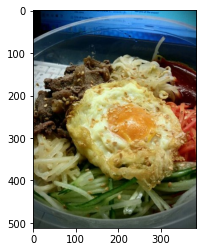

In [ ]:
plt.imshow(imOpen(train[categories[CatrandList[0]]][0] + '.jpg'))
print("This is an example of a bibimbap")


This is an example of a caesar salad


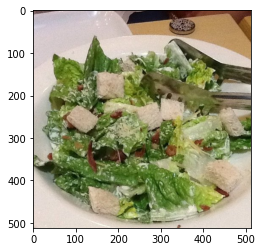

In [ ]:
plt.imshow(imOpen(train[categories[CatrandList[1]]][0] + '.jpg'))
print("This is an example of a caesar salad")


This is an example of a bruschetta


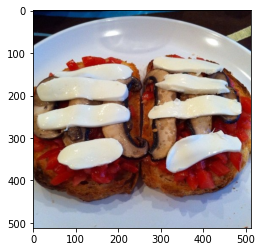

In [ ]:
plt.imshow(imOpen(train[categories[CatrandList[2]]][0] + '.jpg'))
print("This is an example of a bruschetta")


This is an example of a garlic bread


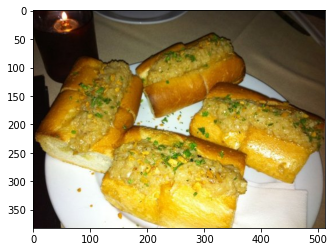

In [ ]:
plt.imshow(imOpen(train[categories[CatrandList[3]]][0] + '.jpg'))
print("This is an example of a garlic bread")


This is an example of a chocolate cake


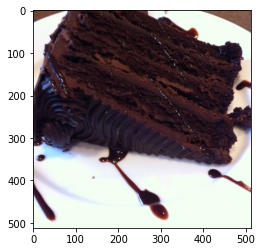

In [ ]:
plt.imshow(imOpen(train[categories[CatrandList[4]]][0] + '.jpg'))
print("This is an example of a chocolate cake")


Now that we have discussed how we selected the data used for this model we want to discuss how we performed the model. Since we are working with images we know that these images will result in higher dimensionality, this results in a complication of how we handle this data, we decided that the two best models that would work with svm are RBF and linear kernels. The reason why we focused primarily on RBFs is due to two reasons,
* First RBF's are able to handle large amounts of data by simply only using the data that is needed to store Support vectors which helps tremendusly to reduce training time space complexity
* Second, RBF's are fairly effective in data with large dimensionality (something that other machine learning models like KNN's fail with), with our type of image data, we needed a model that supported high dimensionality

As for the linear kernel we discovered that it is very inaccurate when it comes to prediction with image data, where it resulted with an overall accuracy of less than 5%. This does make sense since linear kernels rely on the data being linearly seporable which gets quite complex with image data.

We also decided to use the C parameters 1, 10, and 100 to test out different misclassification error rates, we found that the parameter 10 was the most effective at generating the least amount of misclassification errror since it results in a good balance in terms of the tightness of the cutoff value from the decision boundary.

Finally we tried the gamma values .0001, .001 and .01 to define how much each data point should influence training data, we found that the value .0001 was the most effective in training since we had an abundance of data available. We found that since we had so much data, percisely 50*50*3*5000(37467495) features to consider, the 50x50x3 was the number of pixels per image, and the 5000 was the number of images we used for training/testing. 

Once we trained our model, using pickle we saved it so that we could perform further analysis without having to rerun the code again.

Our SVM model code is shown below

In [ ]:
#This is our svm model. It took 456 minutes to run on 3496 training images.capitalize

#NOTE Don't uncomment this code, it will take a long time to run. Shown below is the value that is printed after running this code.

#params = {'C': [1,10,100], 'gamma': [0.0001,.001,.01], 'kernel': ['rbf','linear']}
#svm2 = svm.SVC(probability=True)
#print("Please wait...")
#model = GridSearchCV(svm2, params)
#model.fit(x_train, y_train)
#print('The best params are')
#model.best_params_
#pickle.dump(model, open('svmModel2.p', 'wb'))
print("The best params are {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}")


The best params are {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Now below we will do a bit of metric analysis as shown in each code block below.

In [ ]:
model = pickle.load(open('svmModel2.p', 'rb'))
y_pred = model.predict(x_test)
print("SVM's accuracy is " + str(accuracy_score(y_pred, y_test)*100%))


SVM's accuracy is {64.04131697869593}


As you will observe we managed to achieve an accuracy of around 64%, now while this isn't an incredibly accurate model it is still within expected performance from this type of model. Especially since it sufferes from the issue of large datasets, SVM's training time scales as you add more data, as a matter of fact, after doing some calculations we discovered that if we used all 101 food categories at 1000 images each at a size of 150x150, it would've resulted in a training time of over 40 days!

However, for relatively small datasets, SVM's are able to make really good predictions, We tried running an SVM with only 3 food categories at 300 images each and it was able to achieve an accuracy of almost 80% which begins to make more sense as we look at it in more detail. With enough training data the model is able to make really accurate decision boundaries from small datasets with features that do not overlap.

However, in our model the limitations of SVM shows as you can observe that some of the data does have overlapping features such as shape or color!

Below we generate the classification report going into more detail of our SVM's performance

In [ ]:
a = classification_report(y_pred, y_test)
word = ""
for let in a:
    if let != '\n':
        word = word + let
    else:
        print(word)
        word = ""
print()
print(confusion_matrix(y_pred, y_test))


              precision    recall  f1-score   support

          88       0.69      0.66      0.67       328
         132       0.54      0.55      0.55       306
         144       0.66      0.65      0.66       317
         280       0.71      0.75      0.73       295
         612       0.59      0.60      0.59       303

    accuracy                           0.64      1549
   macro avg       0.64      0.64      0.64      1549
weighted avg       0.64      0.64      0.64      1549

[[215  30  31  21  31]
 [ 24 168  22  42  50]
 [ 26  30 206  17  38]
 [ 15  38  12 221   9]
 [ 30  43  39   9 182]]


In [1]:
def calcAccuracy(key, arr):
    numCorrect = 0
    for element in arr:
        if(element == key):
            numCorrect = numCorrect + 1.
    print(str(numCorrect/len(arr) * 100) + '%')
    
firstKeyPred = [88, 132, 88, 88, 88, 88, 132, 132, 88, 88, 132, 144, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 132, 88, 612, 88, 612, 132, 144, 280, 88, 280, 88, 88, 88, 88, 88, 88, 88, 612, 88, 144, 88, 280, 132, 144, 88, 144, 88, 144, 88, 88, 88, 88, 88, 88, 132, 88, 88, 88, 88, 88, 280, 280, 88, 88, 88, 88, 612, 132, 144, 88, 612, 612, 88, 88, 88, 88, 280, 132, 88, 88, 88, 88, 280, 280, 88, 612, 88, 88, 132, 88, 612, 88, 88, 144, 144, 88, 280, 88, 280, 88, 88, 88, 88, 88, 88, 88, 88, 612, 88, 132, 88, 88, 612, 88, 612, 144, 280, 88, 88, 88, 88, 88, 612, 88, 88, 88, 88, 88, 132, 88, 612, 132, 88, 88, 144, 88, 132, 88, 88, 88, 88, 88, 88, 88, 144, 88, 88, 88, 144, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 612, 88, 88, 88, 612, 612, 88,
                144, 88, 144, 88, 88, 88, 88, 612, 612, 88, 132, 612, 88, 88, 88, 88, 280, 132, 88, 88, 88, 144, 88, 88, 88, 88, 88, 132, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 132, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 132, 88, 88, 88, 88, 88, 612, 88, 88, 88, 144, 88, 280, 612, 88, 88, 88, 612, 88, 88, 88, 88, 88, 88, 612, 88, 144, 88, 88, 88, 88, 88, 144, 144, 88, 144, 280, 88, 88, 88, 88, 144, 88, 612, 88, 88, 144, 132, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 612, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 280, 88, 88, 88, 612, 88, 88, 88, 132, 88, 88, 612, 88, 88, 88, 144, 88, 88, 88, 88, 88, 88, 88, 144, 88, 88, 88, 88, 88, 88, 132, 88, 88, 88, 88, 612, 88, 88, 612, 88, 88, 612, 144, 88, 88, 280, 88, 88, 88, 88, 88, 88, 88, 88, 132]
secondKeyPred = [144, 132, 144, 144, 612, 144, 280, 88, 144, 144, 88, 144, 144, 88, 88, 612, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 612, 280, 280, 612, 144, 88, 144, 144, 144, 144, 132, 612, 144, 144, 88, 144, 144, 132, 144, 144, 144, 612, 612, 144, 612, 144, 144, 144, 144, 612, 144, 144, 144, 144, 144, 144, 88, 144, 144, 144, 144, 144, 144, 144, 144, 144, 132, 612, 88, 144, 144, 144, 144, 132, 144, 144, 132, 280, 144, 132, 144, 88, 144, 144, 144, 144, 144, 88, 612, 144, 144, 144, 144, 144, 144, 280, 144, 144, 132, 144, 144, 612, 144, 144, 88, 144, 144, 144, 144, 144, 144, 144, 280, 144, 144, 144, 144, 144, 88, 144, 88, 612, 144, 144, 144, 144, 612, 144, 144, 612, 144, 144, 144, 144, 144, 144, 144, 612, 144, 612, 88, 144, 88, 144, 144, 144, 144, 144, 144, 144, 132, 132, 132, 144, 144, 144, 144, 144, 144, 280, 144, 144, 144, 612, 144,
                 88, 144, 144, 144, 144, 144, 144, 144, 144, 144, 88, 144, 144, 144, 144, 144, 144, 144, 144, 280, 144, 144, 144, 132, 144, 144, 144, 88, 144, 144, 612, 144, 144, 88, 144, 144, 144, 144, 144, 144, 612, 144, 144, 88, 144, 144, 144, 612, 132, 144, 88, 612, 144, 612, 612, 144, 88, 144, 144, 144, 144, 144, 88, 144, 88, 144, 144, 132, 144, 144, 144, 144, 144, 144, 280, 132, 144, 132, 144, 144, 144, 144, 144, 144, 88, 144, 144, 280, 280, 612, 144, 144, 144, 144, 612, 144, 144, 144, 144, 144, 144, 144, 612, 144, 612, 132, 144, 88, 612, 144, 144, 144, 144, 144, 144, 88, 144, 612, 612, 144, 144, 144, 144, 144, 144, 144, 144, 612, 144, 144, 144, 144, 88, 144, 132, 612, 144, 144, 132, 612, 612, 280, 144, 144, 612, 144, 144, 144, 144, 144, 612, 144, 144, 144, 144, 144, 144, 144, 88, 88, 132, 144, 144, 144, 612, 144, 144, 144, 144, 132, 144, 144, 144, 88, 132, 612, 144]
thirdKeyPred = [132, 280, 280, 132, 88, 88, 132, 88, 612, 280, 132, 132, 132, 132, 132, 280, 132, 612, 132, 132, 132, 88, 132, 132, 280, 132, 144, 612, 132, 132, 132, 132, 280, 132, 132, 612, 132, 88, 132, 132, 132, 132, 132, 612, 280, 132, 132, 132, 132, 132, 280, 132, 132, 132, 132, 132, 132, 132, 612, 132, 612, 132, 132, 132, 144, 132, 280, 612, 132, 132, 280, 280, 132, 132, 280, 132, 280, 132, 280, 132, 132, 132, 132, 132, 132, 612, 132, 144, 132, 88, 132, 132, 88, 144, 612, 280, 144, 612, 132, 144, 132, 88, 88, 132, 132, 612, 132, 88, 612, 280, 612, 132, 88, 280, 132, 144, 132, 612, 132, 132, 132, 88, 132, 612, 612, 132, 144, 132, 612, 132, 132, 612, 132, 132, 132, 132, 88, 88, 132, 132, 612, 132, 132, 144, 132, 132, 132, 88, 612, 88, 132, 132, 132, 612, 612, 132, 132, 132, 144, 132, 88, 144, 612, 132, 132, 144, 132, 612, 132, 132, 132, 612, 132,
                612, 88, 132, 280, 132, 132, 132, 132, 132, 132, 132, 88, 132, 612, 132, 132, 132, 132, 280, 132, 132, 612, 612, 132, 132, 88, 132, 280, 88, 280, 132, 280, 612, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 280, 144, 280, 132, 132, 132, 132, 132, 132, 132, 132, 280, 144, 132, 132, 88, 88, 144, 132, 132, 612, 132, 612, 132, 132, 132, 132, 88, 88, 132, 132, 280, 280, 132, 132, 132, 144, 280, 280, 132, 132, 132, 88, 88, 144, 132, 88, 132, 612, 132, 280, 280, 144, 132, 132, 144, 280, 132, 612, 144, 132, 144, 144, 88, 144, 132, 612, 132, 280, 88, 132, 132, 132, 132, 612, 132, 132, 612, 132, 132, 612, 280, 132, 144, 132, 132, 132, 280, 132, 280, 144, 144, 132, 132, 612, 132, 132, 612, 132, 280, 132, 132, 132, 132, 132, 132, 132, 132, 144, 132, 280, 132, 132, 612, 144, 132, 132, 612, 132, 612, 132, 132, 144, 280, 132, 144, 132, 132, 132]
fourthKeyPred = [280, 280, 280, 280, 132, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 88, 280, 144, 280, 280, 88, 280, 280, 144, 280, 280, 132, 280, 280, 88, 280, 280, 280, 612, 280, 144, 132, 280, 280, 280, 132, 280, 612, 280, 88, 280, 280, 132, 280, 280, 280, 280, 280, 132, 280, 280, 280, 280, 280, 280, 280, 132, 280, 280, 144, 280, 280, 132, 280, 280, 280, 280, 280, 132, 280, 280, 280, 88, 144, 88, 280, 280, 280, 280, 132, 280, 280, 280, 280, 280, 280, 280, 280, 88, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 612, 280, 144, 280, 144, 280, 280, 280, 280, 280, 280, 280, 280, 280, 88, 280, 280, 144, 280, 132, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 612, 280, 144, 280, 280, 280, 132, 280, 280, 280, 280, 280, 280, 612, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 132, 280, 280,
                 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 132, 280, 280, 144, 280, 280, 280, 132, 132, 280, 280, 280, 144, 144, 280, 280, 280, 280, 280, 88, 280, 280, 280, 280, 144, 280, 280, 280, 280, 280, 280, 88, 280, 280, 612, 88, 280, 132, 132, 132, 132, 280, 280, 280, 280, 132, 612, 144, 280, 280, 88, 280, 280, 132, 88, 280, 280, 132, 132, 280, 280, 88, 280, 280, 280, 132, 132, 280, 144, 280, 280, 88, 280, 280, 132, 132, 132, 280, 280, 280, 280, 280, 280, 132, 144, 280, 280, 280, 88, 88, 144, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 88, 280, 280, 280, 280, 132, 144, 280, 88, 280, 280, 132, 280, 280, 280, 132, 280, 280, 280, 88, 280, 280, 88, 88, 132, 144, 280, 280, 280, 280, 132, 280, 280, 144, 280, 280, 280, 280, 132, 132, 280, 280, 280, 280, 132, 132, 612, 612, 280, 132, 280, 280, 612, 280, 280, 280, 280, 280, 88, 280, 132, 280, 280, 132, 132]
fifthKeyPred = [612, 612, 612, 612, 132, 132, 132, 612, 612, 132, 132, 132, 612, 612, 88, 132, 88, 132, 612, 612, 132, 612, 612, 612, 612, 144, 612, 612, 612, 612, 612, 612, 612, 88, 612, 144, 144, 612, 612, 612, 144, 132, 612, 612, 88, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 132, 144, 612, 132, 144, 88, 280, 612, 612, 612, 612, 144, 612, 132, 612, 612, 88, 88, 612, 612, 612, 612, 88, 612, 132, 132, 132, 612, 88, 612, 612, 132, 280, 612, 612, 88, 612, 132, 612, 88, 612, 612, 144, 612, 612, 144, 144, 612, 144, 612, 280, 612, 612, 612, 612, 88, 612, 144, 88, 612, 132, 132, 612, 132, 132, 612, 612, 612, 132, 132, 132, 88, 612, 612, 612, 144, 612, 612, 144, 612, 612, 612, 612, 88, 132, 612, 144, 612, 144, 612, 612, 612, 132, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 132, 612, 612, 612, 144, 612, 612, 612, 612, 132, 612, 612,
                280, 612, 144, 612, 88, 612, 612, 612, 612, 612, 612, 612, 132, 612, 144, 612, 612, 612, 612, 612, 88, 144, 612, 612, 132, 88, 612, 612, 612, 612, 144, 88, 612, 612, 88, 612, 88, 144, 612, 132, 612, 612, 612, 88, 612, 280, 88, 132, 144, 132, 132, 88, 612, 612, 132, 280, 132, 144, 612, 612, 144, 88, 612, 612, 88, 612, 280, 612, 612, 612, 612, 144, 144, 88, 612, 280, 612, 612, 612, 132, 132, 612, 612, 612, 144, 132, 132, 612, 612, 612, 612, 144, 132, 612, 132, 612, 88, 612, 612, 144, 612, 612, 132, 144, 612, 132, 612, 612, 612, 612, 612, 144, 144, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 612, 144, 612, 612, 144, 88, 612, 612, 612, 144, 132, 612, 612, 612, 612, 132, 612, 612, 612, 612, 612, 132, 132, 612, 612, 612, 88, 612, 612, 612, 612, 132, 612, 612, 144, 132, 612, 612, 88, 612, 132, 144, 132, 612, 612, 132, 612, 144, 612, 612, 88, 280, 612]
calcAccuracy(88, firstKeyPred)
calcAccuracy(88, secondKeyPred)
calcAccuracy(88, thirdKeyPred)
calcAccuracy(88, fourthKeyPred)
calcAccuracy(88, fifthKeyPred)

72.57142857142857%
8.857142857142856%
8.595988538681947%
6.571428571428571%
9.142857142857142%


From the cell above you'll observe several interesting points, First is the result that our best food categories were the first and fourth one (bibimbap and chocolate cake). In general our results are relatively remarkable for the amount of data that the SVM had to process. In general if we had to use this method as a image classification algorithm, we would argue that it would be best in a case of determining the difference between two classes rather than introducing lot's of different cases. In the situation where we presented it with 5 different food classes all with varying shapes, colors and sizes where there was overlapping features still performed relatively well. 

In the real world, we would not use this model since image classificaiton can have devastating consequences (Misidentifying a person or object) such as a a 45% failure to identify true positives as shown in the recall rate for the second image class.However in the means of learing, the results of this model and how it processed image data was impressive regardless of the limitations. 

### KNN
In this section we will detail our process for using KNN to attempt to perform classification on a subset of food images.

Similarly to our SVM model:

- We only used 5 food categories, each containint 1000 images where we created a 70/30 training/test split.
- Each image was of size 50x50 as KNN does not do well with high dimensional data and the original 250x250 (plus 3 color channels) would result in 187,500 features.
- Each category was randomly sampled from the full set of 101 categories.
- This model uses the random seed 118 to reproduce results.
- While the KNN training runtime was significantly faster than that of SVM, we still chose to train the model on only five categories to maintain consistency between models and for ease of comparison later on.

Below is the code that randomly samples 5 categories from the entire list of food categories and processes the images into a dataframe. This dataframe of image data is then split into train and test sets to be used in the KNN model.

In [ ]:
random.seed(118)
categories = open('food-101/food-101/meta/classes.txt').read().split()
test = json.load(open('food-101/food-101/meta/test.json'))
train = json.load(open('food-101/food-101/meta/train.json'))

# KNN Work
flat = []
images2 = []
# Resized array ***CRITICAL USE RESIZED ARRAY
scaleddir = 'food-101/food-101/imagesScaled/'

# This gets all images and puts them into a dataframe
# DESIGN NOTES
# Changes image size to 50x50 due to processign speed.
# KNN does not work well with high dimensional data so, 250x250 is too much
index = 0
for cat in random.sample(categories, 5): #categories[:50]:
    print(f'processing category {index}: {cat}...')
    directory = scaleddir + cat    
    # path = randomSampled[index]
    path = [f for f in listdir(directory) if isfile(join(directory, f))]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        img_resized = resize(toArr, (50, 50, 3))
        flat.append(img_resized.flatten())
        images2.append(cat)

print('converting image data into dataframe...')
df = pd.DataFrame(np.array(flat))
print('appending category name to dataframe...')
df['Target'] = np.array(images2)

#Here we create our test to data split, Default is 30
ts = .30
rs = 45
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('Splitting into train and test sets...\n')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=rs, stratify=y)

print("Number of training data: " + str(len(x_train)))
print("Number of testing data: " + str(len(x_test)))

processing category 0: spaghetti_carbonara...
processing category 1: pulled_pork_sandwich...
processing category 2: churros...
processing category 3: foie_gras...
processing category 4: cannoli...
converting image data into dataframe...
appending category name to dataframe...
Splitting into train and test sets...

Number of training data: 3500
Number of testing data: 1500


For our KNN classifier, we opted to search through a range of k from 1 to 20 with a step size of 2, resulting in 10 separate models, each with 4 folds.

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 20, 2))
param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(x_train, y_train)

print('\nThe best params are:', grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("KNN Training Acccuracy: {:.2f}%".format(accuracy))

knn2 = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn2.fit(x, y)
y_test_hat=knn2.predict(x_test)
train_pred = knn2.predict(x_train)
test_accuracy=np.mean(y_test_hat == y_test)*100 # accuracy_score(y_test,y_test_hat)*100
print("KNN Testing Accuracy: {:.2f}%".format(test_accuracy))

Fitting 4 folds for each of 10 candidates, totalling 40 fits

The best params are: {'n_neighbors': 5}
KNN Training Acccuracy: 29.94%
KNN Testing Accuracy: 47.80%


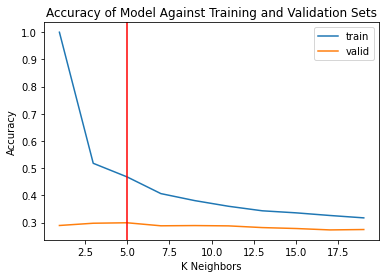

In [ ]:
index = grid.param_grid['n_neighbors']
train = grid.cv_results_['mean_train_score']
valid = grid.cv_results_['mean_test_score']
pd.DataFrame({'train': train, 'valid': valid}, index=index).plot()
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.axvline(x=grid_search.best_params_['n_neighbors'], color='red')
plt.title('Accuracy of Model Against Training and Validation Sets');

The above visualization shows the training and validation scores from the `GridSearchCV` where the validation score was highest at k = 5 indicated by the red line. We then trained another KNN model using all of the data using this found hyperparameter.

We can see that our best performing KNN model achieved an accuracy of around 47%. What's interesting is that the training accuracy is *lower* than the testing accuracy at around 29%. Both of these seem to be at least better than random chance, where we would expect to see roughly 20% accuracy for five categories (1 / # of categories).

Plotting the predictions for the training and test sets alongside the actual data may give us an insight into what is going on.

Training Accuracy
                       precision    recall  f1-score   support

             cannoli       0.59      0.47      0.52       867
             churros       0.22      0.74      0.34       213
           foie_gras       0.48      0.55      0.51       607
pulled_pork_sandwich       0.16      0.77      0.26       143
 spaghetti_carbonara       0.91      0.38      0.54      1670

            accuracy                           0.47      3500
           macro avg       0.47      0.58      0.44      3500
        weighted avg       0.68      0.47      0.51      3500


Testing Accuracy
                       precision    recall  f1-score   support

             cannoli       0.65      0.46      0.54       422
             churros       0.20      0.62      0.30        96
           foie_gras       0.47      0.60      0.53       235
pulled_pork_sandwich       0.16      0.84      0.27        57
 spaghetti_carbonara       0.91      0.39      0.55       690

            accuracy       

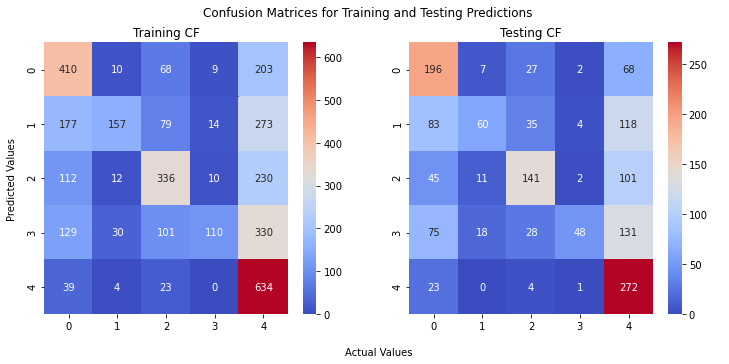

In [ ]:
print('Training Accuracy\n', classification_report(train_pred, y_train))
print('\nTesting Accuracy\n', classification_report(y_test_hat, y_test))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Confusion Matrices for Training and Testing Predictions')

cf_matrix = confusion_matrix(y_train, train_pred)
sns.heatmap(cf_matrix, fmt="d", annot=True, cmap='coolwarm', ax=axes[0])
axes[0].title.set_text('Training CF')

cf_matrix = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cf_matrix, fmt="d", annot=True, cmap='coolwarm', ax=axes[1])
axes[1].title.set_text('Testing CF')

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("\nActual Values")
plt.ylabel("Predicted Values");

We can see that, in both the training and testing datasets, the KNN model usually prefers to predict around three of the five categories, leaving two categories with fewer predictions than the rest. This can be determined by the low precision scores for the `churros`, `foie_gras`, and `pulled_pork_sandwich` categories, indicating a higher rate of false positives predictions.

But is this trend the same across different groups of categories? Since we randomly chose 5 categories to train the KNN model on, perhaps we randomly selected a particularly difficult group of categories to train on. We can run many iterations of the above code and see if they have similar relationships between training and testing accuracies.

In [ ]:
def createRandomData():
    flat = []
    images2 = []
    scaleddir = 'food-101/food-101/imagesScaled/'

    index = 0
    cat_list = random.sample(categories, 5)
    for cat in cat_list: 
        directory = scaleddir + cat    
        path = [f for f in listdir(directory) if isfile(join(directory, f))]
        index = index + 1
        for images in path:
            toArr = imread(os.path.join(directory, images))
            img_resized = resize(toArr, (50, 50, 3)) 
            flat.append(img_resized.flatten())
            images2.append(cat)

    df = pd.DataFrame(np.array(flat))
    df['Target'] = np.array(images2)

    ts = .30
    rs = 45
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=rs, stratify=y)

    return x_train, x_test, y_train, y_test, x, y, cat_list

def runKNN(x_train, x_test, y_train, y_test, x, y, cat_list):
    
    knn = KNeighborsClassifier()
    k_range = list(range(1,21, 2))
    param_grid = dict(n_neighbors = k_range)

    grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
    grid_search = grid.fit(x_train, y_train)

    best_param = grid_search.best_params_

    knn2 = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
    knn2.fit(x, y)
    y_test_hat = knn2.predict(x_test) 
    y_train_hat = knn2.predict(x_train)
    train_accuracy = np.mean(y_train_hat == y_train)*100
    test_accuracy = np.mean(y_test_hat == y_test)*100 
    multi_confusion_matrix = multilabel_confusion_matrix(y_test, y_test_hat, labels=cat_list)
    full_cfmatrix = confusion_matrix(y_test, y_test_hat)
    
    return best_param, train_accuracy, test_accuracy, knn2, multi_confusion_matrix, full_cfmatrix

In [ ]:
# # SAVED IN PICKLE
# accuracies = []
# train_accuracies = []
# params = []
# cats = []
# c_matrices = []
# full_cfmatrices = []

# for i in range(100):
#     print(f'Processing Epoch {i}...')
#     x_train, x_test, y_train, y_test, x, y, cat_list = createRandomData()
#     cats.append(cat_list)
#     best_param, train_accuracy, test_accuracy, knn, confusion_matrices, full_cfmatrix = runKNN(x_train, x_test, y_train, y_test, x, y, cat_list)
#     full_cfmatrices.append(full_cfmatrix)
#     c_matrices.append(confusion_matrices)
#     accuracies.append(test_accuracy)
#     train_accuracies.append(train_accuracy)
#     params.append(best_param['n_neighbors'])
#     print(f'Epoch {i}: {test_accuracy}% Accuracy at {best_param["n_neighbors"]} Neighbors\n')

# data = pd.DataFrame({'train_accuracy': train_accuracies,
#                      'test_accuracy':accuracies,
#                      'parameters':params,
#                      'categories': cats,
#                      'confusion matrices': c_matrices,
#                      'confusionMatrix': full_cfmatrices
#                     })

# for i in list(range(5)):
#     data[f'category{i}'] = data['categories'].str[i]
#     data[f'cf{i}'] = data['confusion matrices'].str[i]

# data = data.drop(columns=['categories', 'confusion matrices'], axis=1)
# data.to_pickle('knn_trials.pkl')

<!-- After running the above code, we pickle the dataframe so we do not have to rerun the time-consuming test. Below is the dataframe containing the `train_accuracy`, `test_accuracy`, 5 categories and their confusion matrices, the overall `confusionMatrix`, as well as the optimal number of K used to train on those 5 specific categories.  -->

The above code is used to run 100 iterations of the training algorithm for KNN, choosing 5 random categories of food from the entire Food-101 dataset. Using these 100 iterations, we can see the distribution and results of using different groups of categories. The K (`parameters`), `train_accuracy`, `test_accuracy`, and confusion matrices for all 5 categories are saved into a dataframe and pickled so we do not have to run the time-consuming code more than once.

In [ ]:
data = pd.read_pickle('knn_trials.pkl')
data.head()

,train_accuracy,test_accuracy,parameters,confusionMatrix,category0,cf0,category1,cf1,category2,cf2,category3,cf3,category4,cf4
0,37.000000,37.400000,11,"[[223, 46, 14, 2, 15], [101, 146, 41, 3, 9], [...",apple_pie,"[[646, 554], [77, 223]]",crab_cakes,"[[1093, 107], [198, 102]]",pancakes,"[[1125, 75], [228, 72]]",cheesecake,"[[1008, 192], [154, 146]]",greek_salad,"[[1189, 11], [282, 18]]"
1,38.028571,41.866667,19,"[[121, 121, 6, 15, 37], [5, 249, 11, 13, 22], ...",falafel,"[[1157, 43], [241, 59]]",tacos,"[[1081, 119], [189, 111]]",bread_pudding,"[[571, 629], [51, 249]]",prime_rib,"[[1147, 53], [212, 88]]",bibimbap,"[[1172, 28], [179, 121]]"
2,100.000000,100.000000,1,"[[300, 0, 0, 0, 0], [0, 300, 0, 0, 0], [0, 0, ...",paella,"[[1200, 0], [0, 300]]",ravioli,"[[1200, 0], [0, 300]]",garlic_bread,"[[1200, 0], [0, 300]]",french_toast,"[[1200, 0], [0, 300]]",takoyaki,"[[1200, 0], [0, 300]]"
3,42.771429,42.666667,15,"[[139, 11, 115, 33, 2], [56, 73, 115, 52, 4], ...",peking_duck,"[[1184, 16], [232, 68]]",ice_cream,"[[1060, 140], [156, 144]]",hot_dog,"[[1152, 48], [227, 73]]",caesar_salad,"[[975, 225], [161, 139]]",hummus,"[[769, 431], [84, 216]]"
4,41.514286,42.266667,13,"[[56, 126, 29, 83, 6], [10, 217, 48, 25, 0], [...",clam_chowder,"[[779, 421], [83, 217]]",dumplings,"[[1101, 99], [164, 136]]",samosa,"[[1192, 8], [275, 25]]",ravioli,"[[904, 296], [100, 200]]",apple_pie,"[[1158, 42], [244, 56]]"


In these 100 iterations, we can visualize the relationships of the test and training accuracies as well as with the hyperparameters with the subplots below:

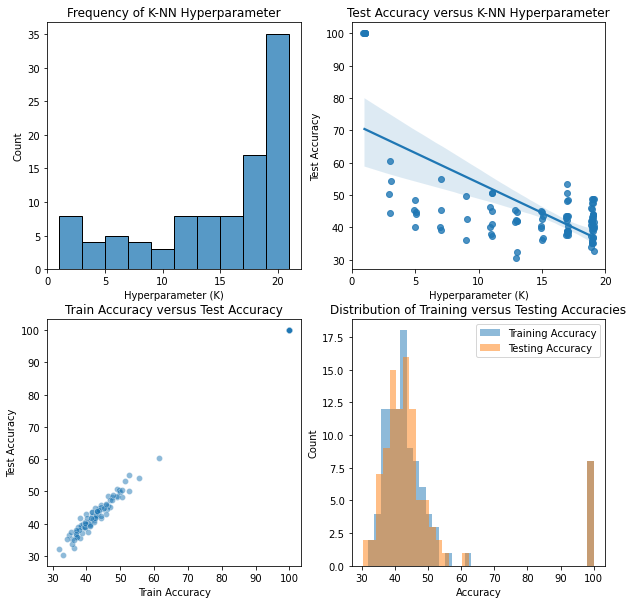

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=data, x='parameters', bins=range(1,22,2), ax=axes[0,0]).set(
    title = 'Frequency of K-NN Hyperparameter',
    xlabel = 'Hyperparameter (K)',
    ylabel = 'Count');
sns.scatterplot(data=data, x='train_accuracy', y='test_accuracy', alpha=0.5, ax=axes[1,0]).set(
    title = 'Train Accuracy versus Test Accuracy',
    xlabel = 'Train Accuracy',
    ylabel = 'Test Accuracy');
sns.regplot(x="parameters", y="test_accuracy", data=data, x_jitter=0.1, ax=axes[0,1]).set(
    title = 'Test Accuracy versus K-NN Hyperparameter',
    xlabel = 'Hyperparameter (K)',
    ylabel = 'Test Accuracy');

plt.hist(data['train_accuracy'], bins=35, alpha=0.5, label="Training Accuracy")
plt.hist(data['test_accuracy'], bins=35, alpha=0.5, label="Testing Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.title("Distribution of Training versus Testing Accuracies")
plt.legend(loc='upper right');

In [ ]:
display(data.mean(), data.median())

train_accuracy    47.047714
test_accuracy     47.000000
parameters        13.660000
dtype: float64

train_accuracy    42.728571
test_accuracy     42.600000
parameters        17.000000
dtype: float64

From 100 iterations of random testing, we can see that the average testing accuracy is ~47% with an average k value of 13-14. We can also see that, on average, training accuracy and testing accuracy has a relatively linear relationship, indicating that the difference between our initial testing and training accuracies may be due to random chance.

Interestingly enough, some of these random iterations concluded that the best fit model was a k of 1, resulting in both 100% training and testing accuracy. Looking instead at the median of this data as it is more resiliant against outliers results in a testing accuracy of ~42.6% with a parameter of 17.

In [ ]:
print(classification_report(y_test_hat, y_test))

                      precision    recall  f1-score   support

             cannoli       0.65      0.46      0.54       422
             churros       0.20      0.62      0.30        96
           foie_gras       0.47      0.60      0.53       235
pulled_pork_sandwich       0.16      0.84      0.27        57
 spaghetti_carbonara       0.91      0.39      0.55       690

            accuracy                           0.48      1500
           macro avg       0.48      0.59      0.44      1500
        weighted avg       0.69      0.48      0.52      1500



Looking back at our initial KNN model and our five randomly chosen categories, we can conclude that our best food categories were `cannoli` and `spaghetti_carbonara`. From our results of multiple iterations of KNN trained on different groups of food categories, we could see that, when introduced to unseen training data, on average, the models saw relatively similar training and testing accuracies. When it comes to image data, KNN seems to perform better when classifying fewer groups. Though our models still performed relatively well when training on images with large variaton between individual images.

Though our model performed relatively well, it is not ideal for real world use due to the extremely high dimensionality of image data as well as the runtime of testing newly introduced data against all other datapoints. The low precision of many of our classes also leads us to believe that, when classifying images into multiple categories, KNN tends to overfit to one particular class, leading to more predictions for that particular class and a higher false positive rate.

# Convolutional Neural Network

The final family of algorithms we will consider is the convolutional neural network (CNN). CNNs are deep learning models that perform especially well when analyzing visual data, such as images. This makes the CNN model a logical choice when selecting an algorithm for image classification. 

This functionality is a result of the CNN's specialized hidden layers, called 'convolutional layers'. These convolutional layers operate on 2D subsets of the image data at a time and output the transformations to the following layers. Transforming 'windows' of pixels simultaneously allows spatial patterns such shapes or edges to be detected and encoded as features. This is advantageous over other algorithms, where the image is flattened into a vector before being fed into the model. 



### Data preproprocessing and splitting.

The CNN will be implemented through the Python deep learning library Tensorflow. One benefit of using Tensorflow is that high dimensional matrices can be declared as the tf.tensor datatype, which is efficent and specizalized for computation in GPUs. This library allows for much more sophisticated models to be trained with much less resources, which is critical when handling high dimensionality data such as images. 

For this reason, we will rescale the images to (100, 100, 3) when training the CNN. Increasing the dimensionality of the image will enable us to extract more information from the data.

The below cell creates a dataset from five radnom categories, with 1000 images from each category, and rescales them to (100, 100, 3). The dataset is then shuffled and split into 70/30 train-test sets, and converted from Numpy arrays to tf.tensors. 



In [3]:
img_dim = 100 #100x100 rehshaped image, b/c neural networks perform well under high dimensionality compared to the previous models.
scaled_X = []
images2 = []

scaleddir2 = 'C:/food-101/food-101/imagesScaled/'
## SAMPLE DATASET
index = 0
for cat in random.sample(categories, 5):
    directory = scaleddir2 + cat    
    path = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        img_resized = resize(toArr, (100, 100,3))
     
        scaled_X.append(img_resized)
        images2.append(categories.index(cat))

scaled_X = np.array(scaled_X)

# ENCODE LABELS AS INTEGERS

le = preprocessing.LabelEncoder()
le.fit(images2)

# CONVERT DATA TO TF.TENSORS

x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(scaled_X, le.transform(images2), test_size=0.3, random_state=42, stratify=le.transform(images2), shuffle = True)
x_train_tensor = tf.convert_to_tensor(x_train_cnn)
x_test_tensor = tf.convert_to_tensor(x_test_cnn)
y_train_tensor = tf.convert_to_tensor(y_train_cnn)
y_test_tensor = tf.convert_to_tensor(y_test_cnn)


## Hyperparameter selection

The hyperparameters that we will consider for the CNN are:

* Depth (the number of convolutional layers.)

* Filters (the number of transformations that are applied to each convolution window)

Increasing the depth of a CNN results in fewer total parameters to train, because the parameters of the CNN are reduced, or pooled, as they travel deeper through the model. Deeper models allow for more refined features to be extracted from the input, as more transformations are applied to it.

Increasing the quantity of output filters directly increases the total amount of parameters to be trained in the model, at the cost of higher computational expense. This may lead to overfitting and poor performance on the test set due to high variance.


## Metric

Models will be compared according to their accuracy on the test set. Accuracy is appropriate for this situtation because our dataset is balanced and each category has an equal number of samples.

### Model 1: 

CNN with 3 convolutional layers. Number of filters: (32, 64, 64)

In [4]:
#complexity decreases deeper in the model, so we can afford to increase #filters.
model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),
## 5 output layers, 5 classes
        
    ])


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #SCC is optimal for multiclass models
              metrics=['accuracy'])
              
model_cnn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0

I chose Model 1 to be the baseline model for this process, as it is a very basic CNN. It contains three convolutional layers followed by 'dense layers'. Dense layers are the final stage of the CNN and transform the data into an encoded output vector that determines the image's class. There are five classes in the dataset, so the final dense layer outputs a 5-d one-hot vector.

The summary of Model 1 states the model has 1,863,045 total parameters to train, which is very complex compared to other algorithms.

Epoch 1/15
110/110 [==============================] - 18s 161ms/step - loss: 1.5525 - accuracy: 0.3077 - val_loss: 1.4263 - val_accuracy: 0.4073
Epoch 2/15
110/110 [==============================] - 18s 159ms/step - loss: 1.4008 - accuracy: 0.4160 - val_loss: 1.3193 - val_accuracy: 0.4527
Epoch 3/15
110/110 [==============================] - 17s 158ms/step - loss: 1.3109 - accuracy: 0.4669 - val_loss: 1.4145 - val_accuracy: 0.3933
Epoch 4/15
110/110 [==============================] - 18s 162ms/step - loss: 1.2461 - accuracy: 0.5029 - val_loss: 1.2796 - val_accuracy: 0.4787
Epoch 5/15
110/110 [==============================] - 17s 158ms/step - loss: 1.1175 - accuracy: 0.5557 - val_loss: 1.2510 - val_accuracy: 0.4980
Epoch 6/15
110/110 [==============================] - 19s 174ms/step - loss: 0.9910 - accuracy: 0.6189 - val_loss: 1.2246 - val_accuracy: 0.5320
Epoch 7/15
110/110 [==============================] - 17s 156ms/step - loss: 0.8850 - accuracy: 0.6626 - val_loss: 1.3565 - val_ac

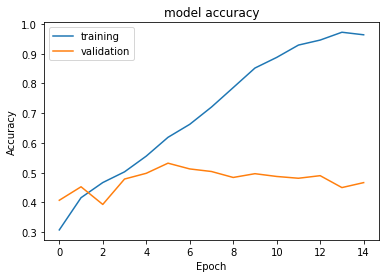

Maximum Validation Accuracy =  0.5320000052452087


In [5]:
history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=15, 
                    validation_data=(x_test_tensor, y_test_tensor))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

In [6]:
y_pred_prob = model_cnn.predict(x_test_tensor)
y_pred_classes = y_pred_prob.argmax(axis = -1)

y_pred_decoded = []
y_test_decoded = []
for i in le.inverse_transform(y_pred_classes):
   y_pred_decoded.append(categories[i])

for i in le.inverse_transform(y_test_tensor):
        y_test_decoded.append(categories[i])




print(classification_report(y_pred_decoded,y_test_decoded))

47/47 [==============================] - 2s 31ms/step
               precision    recall  f1-score   support

     beignets       0.66      0.57      0.62       347
bread_pudding       0.20      0.41      0.27       148
   bruschetta       0.59      0.45      0.51       394
       hummus       0.38      0.44      0.41       262
  panna_cotta       0.50      0.43      0.46       349

     accuracy                           0.47      1500
    macro avg       0.47      0.46      0.45      1500
 weighted avg       0.51      0.47      0.48      1500



Model 1 performed similarly to SVM, and better than KNN. One major benefit is the time complexity. While the SVM model took ~9 hours to train, training the CNN Model 1 took ~4 minutes. This benefit alone gives the CNN a massive advantage over other algorithms. 

When observing the validation curves, the maximum test accuracy was achieved at epoch 3, while the training accuracy continued to increase. This suggests that the model was overfitting to variance in the data. In this case, bread pudding performed significantly worse than the other categories in terms of f1-score and precision. This is likely due to high variance within categories, leading to an increase in false positives.

### Model 2: 
CNN with 5 convolutional layers and filters (32, 64, 64, 64, 64)

In [8]:


## DEFINE THE MODEL ##

model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (img_dim,img_dim,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'sigmoid'),
        layers.Dense(5),
    ]
)


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #SCC is optimal for multiclass models
              metrics=['accuracy'])

## SUMMARY OF MODEL

model_cnn.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)      

Model 2 has a significantly lower number of trainable parameters than Model 1, at 146,949. 

Epoch 1/15
110/110 [==============================] - 18s 159ms/step - loss: 1.5679 - accuracy: 0.2749 - val_loss: 1.4708 - val_accuracy: 0.3380
Epoch 2/15
110/110 [==============================] - 17s 154ms/step - loss: 1.4470 - accuracy: 0.3806 - val_loss: 1.4115 - val_accuracy: 0.3873
Epoch 3/15
110/110 [==============================] - 17s 154ms/step - loss: 1.3813 - accuracy: 0.4209 - val_loss: 1.3879 - val_accuracy: 0.3947
Epoch 4/15
110/110 [==============================] - 17s 151ms/step - loss: 1.3098 - accuracy: 0.4657 - val_loss: 1.2969 - val_accuracy: 0.4640
Epoch 5/15
110/110 [==============================] - 16s 142ms/step - loss: 1.2683 - accuracy: 0.4886 - val_loss: 1.2742 - val_accuracy: 0.4787
Epoch 6/15
110/110 [==============================] - 16s 143ms/step - loss: 1.1803 - accuracy: 0.5417 - val_loss: 1.1704 - val_accuracy: 0.5533
Epoch 7/15
110/110 [==============================] - 16s 144ms/step - loss: 1.1217 - accuracy: 0.5597 - val_loss: 1.1475 - val_ac

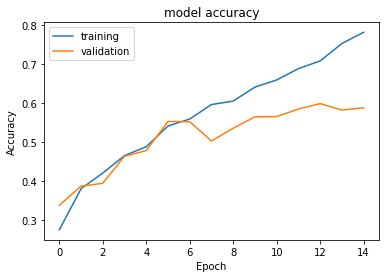

Maximum Validation Accuracy =  0.5993333458900452


In [9]:
#PLOT VALIDATION CURVES AND FIND MAX(VAL_ACCURACY)
history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=15, 
validation_data=(x_test_tensor, y_test_tensor))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

In [10]:
## CONVERT CLASS PROBS AND DECODE LABELS TO ORIGINAL STRING LABELS 

y_pred_prob = model_cnn.predict(x_test_tensor)
y_pred_classes = y_pred_prob.argmax(axis = -1)

y_pred_decoded = []
y_test_decoded = []
for i in le.inverse_transform(y_pred_classes):
   y_pred_decoded.append(categories[i])

for i in le.inverse_transform(y_test_tensor):
        y_test_decoded.append(categories[i])




print(classification_report(y_pred_decoded,y_test_decoded))

47/47 [==============================] - 2s 32ms/step
               precision    recall  f1-score   support

     beignets       0.74      0.66      0.70       337
bread_pudding       0.61      0.47      0.53       387
   bruschetta       0.65      0.68      0.67       286
       hummus       0.45      0.55      0.50       247
  panna_cotta       0.49      0.60      0.54       243

     accuracy                           0.59      1500
    macro avg       0.59      0.59      0.59      1500
 weighted avg       0.60      0.59      0.59      1500



Model 2 has a higher maximum test set accuracy than Model 1. The training and validation curves of Model 2 take a very similar trajectory over epochs, suggesting that reducing model complexity resulted in less overfitting. Also, Model 2 had a slightly lower runtime at ~3 minutes. In particular, beignets performed very high on precision. This can be attributed to beignets' visual homogoneity within groups. Another result to note is that bread pudding received much higher classification scores with Model 2 than in Model 1, along with all other categories. In this case, bread pudding is a category that is highly prone to variance and overfitting, so its metrics greatly increased when model complexity is decreased. In general, Model 2's reduced complexity makes it more appropriate for this task than Model 1, because it dampens overfitting.

### Model 3:

 3 Convolutional layers. Increase # of output filters to (64, 128, 128).

In [11]:
model_cnn = models.Sequential(
    [
        layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (100,100,3)), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 flatten_2 (Flatten)         (None, 56448)            

Very complex model, there are 3,836,293 parameters to train. 

Epoch 1/15
110/110 [==============================] - 37s 332ms/step - loss: 1.5394 - accuracy: 0.3140 - val_loss: 1.4272 - val_accuracy: 0.3687
Epoch 2/15
110/110 [==============================] - 36s 326ms/step - loss: 1.4072 - accuracy: 0.4023 - val_loss: 1.3451 - val_accuracy: 0.4547
Epoch 3/15
110/110 [==============================] - 36s 327ms/step - loss: 1.3240 - accuracy: 0.4600 - val_loss: 1.3818 - val_accuracy: 0.4487
Epoch 4/15
110/110 [==============================] - 36s 327ms/step - loss: 1.2219 - accuracy: 0.5180 - val_loss: 1.2540 - val_accuracy: 0.5180
Epoch 5/15
110/110 [==============================] - 36s 326ms/step - loss: 1.1583 - accuracy: 0.5509 - val_loss: 1.2354 - val_accuracy: 0.5127
Epoch 6/15
110/110 [==============================] - 36s 330ms/step - loss: 1.0595 - accuracy: 0.5997 - val_loss: 1.2446 - val_accuracy: 0.5360
Epoch 7/15
110/110 [==============================] - 36s 327ms/step - loss: 0.9768 - accuracy: 0.6306 - val_loss: 1.3686 - val_ac

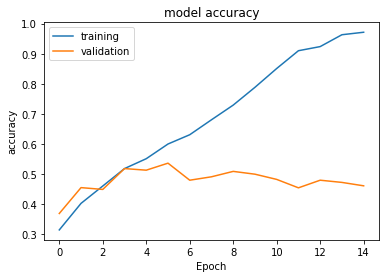

Maximum Validation Accuracy =  0.5360000133514404


In [12]:
#Validation Curves
history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=15, 
validation_data=(x_test_tensor, y_test_tensor))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

In [13]:
y_pred_prob = model_cnn.predict(x_test_tensor)
y_pred_classes = y_pred_prob.argmax(axis = -1)

y_pred_decoded = []
y_test_decoded = []
for i in le.inverse_transform(y_pred_classes):
   y_pred_decoded.append(categories[i])

for i in le.inverse_transform(y_test_tensor):
        y_test_decoded.append(categories[i])




print(classification_report(y_pred_decoded,y_test_decoded))

47/47 [==============================] - 3s 69ms/step
               precision    recall  f1-score   support

     beignets       0.56      0.62      0.59       269
bread_pudding       0.38      0.35      0.36       332
   bruschetta       0.44      0.55      0.49       243
       hummus       0.47      0.42      0.44       340
  panna_cotta       0.44      0.42      0.43       316

     accuracy                           0.46      1500
    macro avg       0.46      0.47      0.46      1500
 weighted avg       0.46      0.46      0.46      1500



Model 3 had a lower maximum test accuracy score than both Model 1 and Model 2. The validation curves depict the test error flattening while the training error continues to improve. This model is far too complex, and has another downside of high computational cost. Model 3 took ~20 minutes to train, a large increase over the previous two models. Model 3's metrics all performed relatively poorly when compared to models 1 and 2.

### CNN Model Selection - Summary

In conclusion, Model 2 was the best performing model in terms of both test accuracy and runtime. In this case, increasing the depth of the CNN increased validation accuracy because it decreased the complexity of the model. Higher complexity CNNs are prone to overfit because our training set is small and has very high variance. 

Due to CNN's advantages, we can conclude that CNNs are close to effective as SVMs and better than KNN when applied to the task of multiclass image classification. This is because KNN struggles when faced with high dimensionality RGB image data, and yields a lower accuracy.

# Discussion

### Interpreting the result

As shown in our results, the SVM model was the best model to implement for our goal. This is likely because this model is able to implement a kernel transformation that can handle high-dimensional data. Our CNN model came close too, with its ability to approach nonlinearity problems using depth and filter size. KNN unfortunately performed worse than the others.

When exploring the SVM algorithm, we intended to tweak the tightness of allowed error, gamma, and kernel hyperparameters so as to see which mixture of misclassification rates, datapoint influence, and type of kernel manipulation would yield the best classification on validation data. We found that the best C value in this instance was C = 10 which is reasonable as too high of a C value would result in very low generalization ability and a low C value would yield a lot of misclassification as it is not trying enough to separate data points accurately. The gamma value was optimized at 0.0001 which is very low but is likely able to generalize better than a higher value as a higher value would yield too little curvature and higher training accuracy but low generalization. In addition to these parameters, kernel type was considered. As was mentioned earlier, the RBF kernel type works best when dealing with our problem as it is able to work effectively with high-dimension data and reduces complexity. 

From the results of our SVM algorithm, we can confidently state that it has a modest accuracy at 64%. The precision score was around 0.64, thereby representing a modest precision level suggesting that when an item is positively classified, it will be achieved correctly about around 65% of the time. Meanwhile, with average recall being 0.642, we can expect that our algorithm will make some false negatives but for the most part should identify actual positives correctly.

The second algorithm we explored was the KNN algorithm. We intended to tweak the K value to see what the best number of nearest neighbors would work to achieve high accuracy. We found that increasing K led to a drastic fall in training accuracy and a very small increase in validation accuracy. We also found that the training accuracy of 29% is lower than our testing accuracy 47.8% which could be explained by our training and testing set being very different in distribution and we sampled some categories randomly. What was also interesting was that our validation acccuracy was lower than our testing accuracy. This discrepancy we can try to explain by deducing that the number of datapoints we trained with was very low. We also saw a couple more oddities, for example with K = 1, we obtained two instances where we achieved a 100% testing accuracy and we got a ton of instances where a very high K value of 20 was selected as the best hyperparameter value. The former is hard to explain, as it'd be expected that K = 1 would overfit to training data and so testing data would not be generalized all that well. For the latter, we predict that a high K value allows us to not overfit at all and thus generalizes well to testing data.

From the results of our KNN algorithm, we can see that it has a low accuracy score at 47.8%, meaning it won't predict too well. A precision of 0.478 is also low, so we expect to see a lot of false positives. A recall score 0.582 is on par with the other models, and this means that will be able identify actual positives correctly 58.2% of the time. The precision score and recall score made the F1 score be a measly 0.438, so this model should not be selected as it is likely we will get plenty of false positives and false negatives.

The third algorithm we explored was the renowned CNN arichitecture. We modified the number of convolutional layers (depth) and the number of transformations (filters) as was seen above. The high depth value and low filter value gave us the most optimal CNN model which is reasonable as a higher depth would lead to more refined and prominent features being used that could increase accuracy of our model and low filter value allows us to generalize better to other data besides training data. A lower depth, which was seen in our first CNN model results in a lot of parameters to train, thereby increasing the chances we overfit and thus our algorithm not generalizing well. When increasing filters as seen in model 3, we saw a lot more parameters to train that in model 1. Unfortunately, adding so many parameters lead to a lot of overfitting to the training data (achieving a level of 100% accuracy) that the validation curve comes out to be generalized very poorly, reaching a validation accuracy of up to 53.6%.

When looking at the performance of our CNN architecture, we saw a varying range of accuracy depending on categories selected. One of our first iterations had the CNN architecture achieve a high accuracy score of 68%, with its model 1 and model 3 coming in close, but on our last iteration with other categories this model achieved an accuracy score of 59.93%. Clearly we see some inconsistency with the CNN model, which could also be the result of the data it took being very difficult to classify, which was likely the result of bad luminance or interfering colors. Otherwise, its precision score and recall score of 0.588 and 0.592 were modest, but not enough to fully be trusted in making accurate predictions. 

It is important to note that although accuracy is a good measurement to see how well our algorithms are classifying, it is also important to take into account other measures like precision and recall and the overall F1 score to make a thorough decision on whether or not our algorithm is working as we want it to. We can immediately rule out the KNN algorithm as a good model for classifying food since it falls significantly below the other models in all metrics except recall. When comparing SVM and CNN we can see that SVM achieved better accuracy as well as higher precision and recall scores that gave it a higher F1 score. Therefore, due to the significance of difference in each score we can say that SVM performed better.

### Limitations

Unfortunately our implementations of our chosen models ran into a few problems. Our SVM algorithm required a lot of computing power/resources and its training duration was ruthlessly long, taking a whopping 9 hour for training only 5000 images. Our KNN algorithm did not take as long as SVM, but it still took a good while to train. We do note that randomness in choosing food categories may lead to inconsistent training and testing accuracies, with sometimes the testing accuracy being higher than the training accuracy. Our CNN algorithm was not able to be trained with only 1k images of each category because each category has high variance so 1k images would not be enough to be representative of the entire set of points in a category. Additionally, CNN’s by nature are a black box and so are very complex and work with a lot of parameters and hyperparameters so it is very hard interpret them and their functionality. 
  

### Ethics & Privacy

If our model is being used to find out what food someone is looking at, if we return a badly classified result then this would normally be okay as the user would know not to fully rely on a model that could predict wrong. But in one severe case, some people's cultures pride themselves on their food and having someone learn the incorrect food and tell someone of that culture that their food is actually something else (the wrong classification our model gave) then this could offend and disrespect said cultures. As such we need to ensure our model has high accuracy and precision but also let the user of the model know that the model is not perfect and should not think all returned classification values are final.

To avoid any problems from unintended issues, we intend to try to fix such issues by allowing for our model to be reviewed by people and raise issues that we may have unforeseen. Upon acknowledgement of such issues, we will review the model and think of solutions that we can implement that will change the model that will solve the issue but at the same time return accurate results.

To make sure we are considering ethics, we will attempt to create a checklist that will ensure that all ethical implications are understood and therefore minimized.

### Conclusion

To reiterate, when selecting the best model to perform image recognition on food, Convolutional Neural Networks outperformed the K-Nearest Neighbors algorithm and the Support Vector Machines model as it offered the ability to have a simplified algorithm with a low number of trainable parameters. This advantage allows it the ability to not overfit to training data but instead achieve a good generalization, which is shown in the validation curve achieving a higher accuracy rate than the other models. It should be noted however that SVM also came close in accuracy so it is possible that with better optimization, we could get the SVM model to work just as well as the CNN model. Only downside would be the large amount of time it takes to train it. In comparison to the paper attempting to classify images with random forests, which achieved an accuracy of 58%, we have shown that the field of machine learning has created better algorithms that are capable of doing image recognition better, those including the SVM model as well as the CNN architecture. 

To reiterate, when selecting the best model to perform image recognition on food, we found that the SVM model outperformed KNN and CNN in all metrics. It is very likely that the rbf kernel transformation was the reason why the SVM model did good as it gave it the ability to reach into higher dimensionality well and classify well with a curvature structure. It should be noted however that CNN came close in metrics so it is possible that with better optimization, we could get the CNN model to work just as well as the SVM model. In comparison to the paper attempting to classify images with random forests which achieved an accuracy of 58%, we have shown that the field of machine learning has created better algorithms that are capable of doing image recognition better, those including the SVM model as well as the CNN architecture. 

All in all, if we are able to access more computing resources, we could manage to speed up the time of training for our algorithms which could very well assist SVM. Doing so will allow us to proceed to the next steps in food predictions, like being able to count calories based on images or macronutrients, or possibly sending a doctor a food log just using your images. If our algorithm is able to achieve much higher accuracy, precision, and recall scores we can expect for the use of an app that tracks all we mentioned above to become very popular and help in health and fitness.

# Footnotes
<a name="bossardnote"></a>1.[^](#bossard): Bossard <i>et al</i>. (Sep 2014) Food-101 - Mining Discriminative Components with Random Forests. https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf<br>
<a name="felzenszwalbnote"></a>2. [^](#felzenszwalb): Felzenszwalb, P.F., Girshick, R., McAllester, D., Ramanan, D.: Object detection
with discriminatively trained part based models. PAMI (2010)<br>
<a name="joutounote"></a>3. [^](#joutou): Joutou, T., Yanai, K.: A food image recognition system with Multiple Kernel Learning. In: ICIP (2009)<br>
<a name="kawanonote"></a>4. [^](#kawano): Kawano, Y., Yanai, K.: Real-Time Mobile Food Recognition System. In: IEEE Conference on Computer Vision and Pattern Recognition Workshops (2013)<br>
<a name="yangnote"></a>5. [^](#yang): Yang, S.L., Chen, M., Pomerleau, D., Sukthankar, R.: Food recognition using statistics of pairwise local features. In: CVPR (2010)